In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

from sklearn import linear_model #For missing values
from sklearn.preprocessing import StandardScaler #For scaling features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #Linear Regressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor #Random Forest Regressor

In [4]:
df = pd.read_excel('Diamond prices.xlsx')

In [5]:
df.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [6]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [10]:
##len(df[df.duplicated()])
df.drop_duplicates(inplace=True)

In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
zeros = (df['x'] == 0).sum()
zeros

7

In [16]:
x_zero = df['x']
x_zero.replace(to_replace = 0, value = x_zero.median(), inplace=True)

In [18]:
m = (df['x'] == 0).sum()
m

0

In [22]:
yy =(df['y'] == 0).sum()
yy

6

In [23]:
y_zero = df['y']
y_zero.replace(to_replace = 0, value = y_zero.median(), inplace=True)

In [24]:
z_zero = df['z']
z_zero.replace(to_replace = 0, value = z_zero.median(), inplace=True)

In [25]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


C:\Users\dell-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


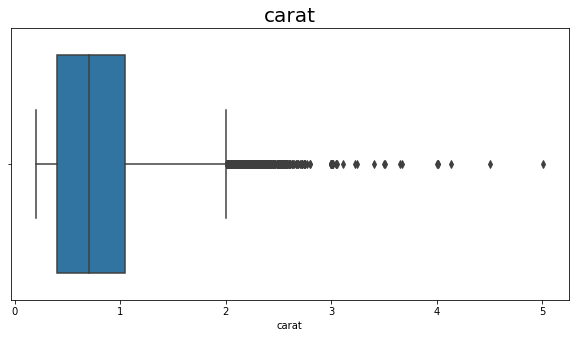

C:\Users\dell-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


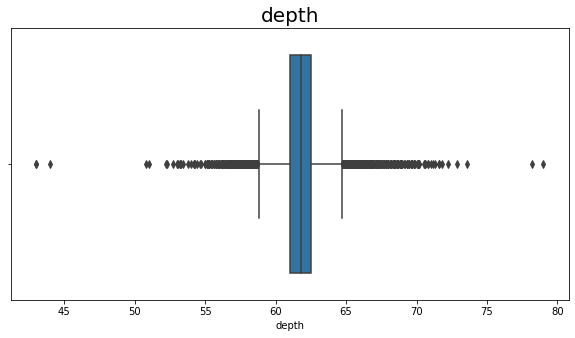

C:\Users\dell-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


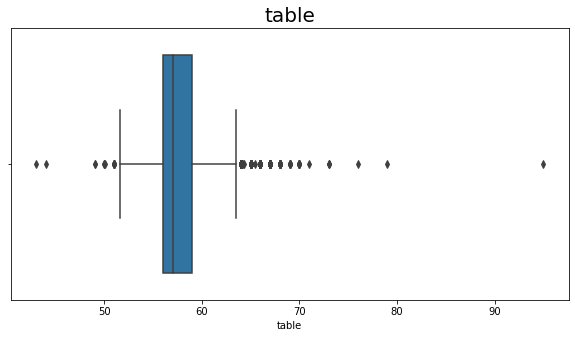

C:\Users\dell-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


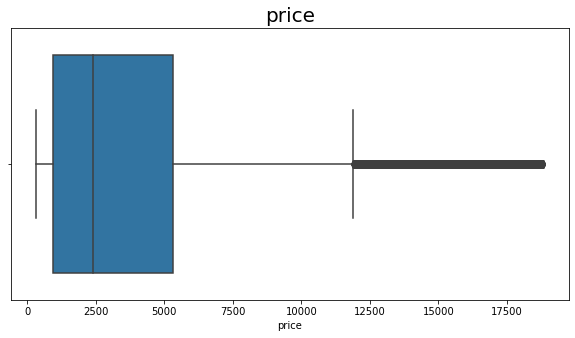

C:\Users\dell-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


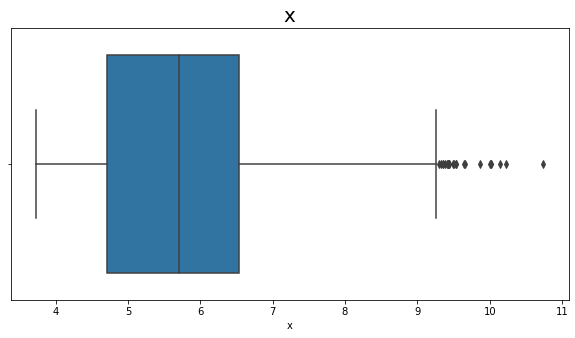

C:\Users\dell-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


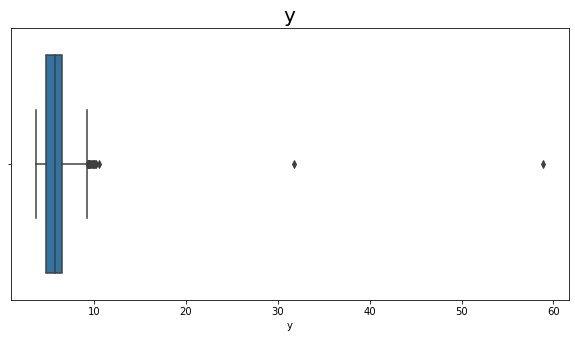

C:\Users\dell-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


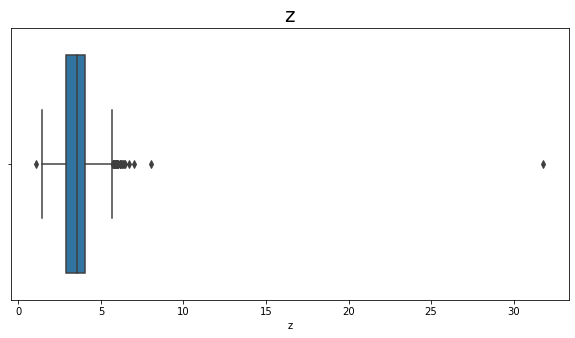

In [27]:
''' boxplot '''
for c in ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[c])
    plt.title(c, fontsize=20)
    plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [30]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['y']>30)[0]
#lower_array = np.where(df_diabetes['bmi']<=lower)[0]

df.drop(index=upper_array, inplace=True)
#df_diabetes.drop(index=lower_array, inplace=True)

In [35]:
upper_array = np.where(df['y']>30)
upper_array

(array([24011, 49045], dtype=int64),)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53792 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53792 non-null  float64
 1   cut      53792 non-null  object 
 2   color    53792 non-null  object 
 3   clarity  53792 non-null  object 
 4   depth    53792 non-null  float64
 5   table    53792 non-null  float64
 6   price    53792 non-null  int64  
 7   x        53792 non-null  float64
 8   y        53792 non-null  float64
 9   z        53792 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


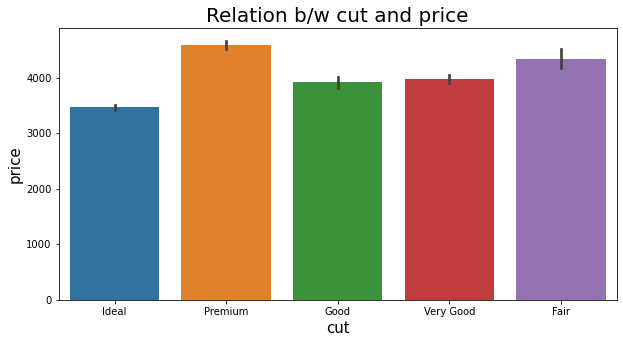

In [36]:
''' barplot between cut and price '''
plt.figure(figsize=(10, 5))
sns.barplot(x='cut', y='price', data=df)
plt.title('Relation b/w cut and price', fontsize=20);
plt.xlabel('cut', fontsize=15)
plt.ylabel('price', fontsize=15);

C:\Users\dell-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


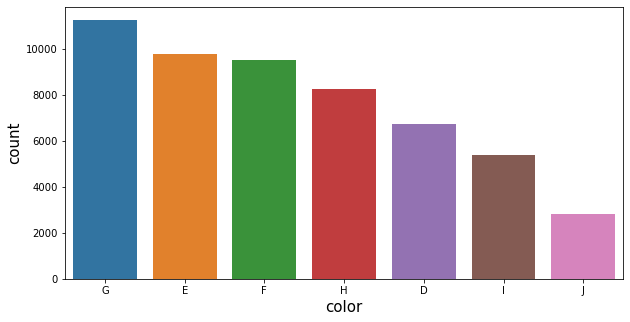

In [37]:
''' color category '''
color_label = df.color.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(color_label.index, color_label);
plt.ylabel('count', fontsize=15)
plt.xlabel('color', fontsize=15);

In [59]:
''' Preprocessing of data '''

''' independent and dependent variabels '''
b = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = df[['price']]

In [68]:
b.head(3)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31


In [69]:
y.head()

,price
0,326
1,326
2,327
3,334
4,335


In [70]:
X = b.copy()
X = pd.get_dummies(data = X ,columns=['clarity', 'color', 'cut'],drop_first=True)
X

,carat,depth,table,x,y,z,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,...,color_E,color_F,color_G,color_H,color_I,color_J,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

In [71]:
''' scaling '''
sc = StandardScaler()

X = sc.fit_transform(X)

In [93]:
X.shape

(23, 53792)

In [94]:
X = X.transpose()

In [100]:
X.shape

(53792, 23)

In [95]:
y.shape

(53792, 1)

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [98]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [110]:
X_train.shape

(43033, 23)

In [111]:
y_train.shape

(43033, 1)

In [101]:
prediction = regression.predict(X_test) 
prediction.shape

(10759, 1)

In [102]:
a = regression.score(X_test, y_test)
a

0.8514820094753162

In [103]:
y_test.shape

(10759, 1)

In [105]:
score=r2_score(y_test ,prediction)
score

0.8514820094753162

In [113]:
randomf = RandomForestRegressor(n_estimators=300)
randomf.fit(X_train, y_train.values.ravel())


RandomForestRegressor(n_estimators=300)

In [116]:
y_pred = randomf.predict(X_test) 
sc=r2_score(y_test ,prediction)
sc

0.8514820094753162